In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

-896575.228282571


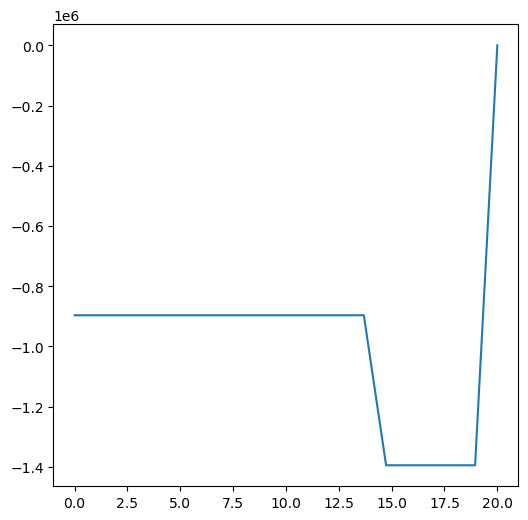

In [ ]:
#EAE 135 Project 2
#Andrew Matel
#Nicholas Rusali

### Given Info
## Lengths
D = 3 #m
t_layers = 0.005 #m
L = 20 #m
Ri = 1.490 #m
Ra = 1.495 #m
Rc = 1.5 #m
## Forces
Thrust = 1250*(10**3) #N
Lift = 1400*(10**3) #N
Weight = 500*(10**3) #N
alf = math.radians(5) #rads

## Material Properties
#CFRP
E11_cfrp = 148.24 #GPa
E12_cfrp = 10.07 #GPa
G12_cfrp = 5.58 #GPa
v12_cfrp = 0.30 
#Al 6061
syc_Al = -289.6 #MPa (yield stress in compression)
syt_Al = 289.6 #MPa
Ec_Al = 69.69 #GPa
Et_Al = 68.95 #GPa
G_Al = 26.2 #GPa
v_Al = 0.33 #GPa

### Reactions at Cantilever
R1 = Thrust - (Lift+Weight)*(math.sin(alf))
R2 = (Weight - Lift)*math.cos(alf)
M3 = (Weight*(L-5)-Lift*L)*math.cos(alf)

### Internal Force Calculations
Shear = np.zeros(20)
for i in range(0,len(Shear)):
    if (i<14):
        Shear[i] = R2
    elif (i>=14) & (i<19):
        Shear[i] = R2 - Weight*(math.cos(alf))
    else:
        Shear[i] = 0
plt.figure(figsize = [6,6])
plt.plot(np.linspace(0,20,20), Shear)


